In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('mako')
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold

In [2]:
# reading dataset

df = pd.read_csv("./League of Legends Champion Stats 13.1.csv")
df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,57.63,-31.86,47.68%,91.63%,6.62%,11.98%,1.77
1,Ahri,Mage,MID,S,57.18,4.55,49.50%,94.65%,5.81%,1.73%,2.58
2,Akali,Assassin,MID,S,65.49,4.33,48.41%,75.74%,8.11%,13.02%,2.37
3,Akali,Assassin,TOP,C,39.63,-1.51,45.92%,23.50%,2.55%,13.02%,2.00
4,Akshan,Marksman,MID,A,49.39,0.34,51.62%,66.03%,2.75%,3.79%,2.26
...,...,...,...,...,...,...,...,...,...,...,...
239,Zilean,Support,MID,A,51.52,-3.47,53.33%,15.52%,0.49%,1.40%,3.59
240,Zilean,Support,SUPPORT,A,48.35,-2.49,50.95%,79.72%,2.67%,1.40%,3.11
241,Zoe,Mage,MID,A,48.46,2.43,49.14%,87.85%,3.45%,1.45%,2.60
242,Zoe,Mage,SUPPORT,D,28.33,-3.55,47.73%,10.03%,0.37%,1.45%,2.14


In [3]:
df.describe()

,Score,Trend,KDA
count,244.000000,244.000000,244.000000
mean,50.000164,-0.677992,2.371230
std,13.587751,9.378966,0.410697
min,21.300000,-35.520000,1.480000
25%,41.462500,-4.522500,2.080000
50%,47.905000,-0.470000,2.350000
75%,56.735000,3.640000,2.592500
max,97.260000,50.000000,3.880000


 Check for value_counts of categorical features

In [4]:
df.Role.value_counts()

MID        64
TOP        59
JUNGLE     49
SUPPORT    46
ADC        26
Name: Role, dtype: int64

In [5]:
df.Tier.value_counts()

A      61
B      61
C      37
S      36
D      25
God    24
Name: Tier, dtype: int64

In [6]:
df.Class.value_counts()

Fighter     72
Mage        60
Marksman    36
Tank        30
Assassin    26
Support     19
Name: Class, dtype: int64

In [7]:
# Checking null values

df.isnull().sum()

Name      0
Class     1
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [8]:
# Dropping null values

df = df.dropna(how = 'any')

In [9]:
df.isnull().sum()

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [10]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %      object
Role %     object
Pick %     object
Ban %      object
KDA       float64
dtype: object

In [11]:
# Replacing '%' symbol to convert the dtypes of features

df['Win %'] = df['Win %'].replace(to_replace='%', value=' ', regex=True)
df['Role %'] = df['Role %'].replace(to_replace='%', value=' ', regex=True)
df['Pick %'] = df['Pick %'].replace(to_replace='%', value=' ', regex=True)
df['Ban %'] = df['Ban %'].replace(to_replace='%', value=' ', regex=True)

In [12]:
# Converting features from object type to float type

df['Win %'] = df['Win %'].astype('float')
df['Role %'] = df['Role %'].astype('float')
df['Pick %'] = df['Pick %'].astype('float')
df['Ban %'] = df['Ban %'].astype('float')

In [13]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

In [14]:
# Dropping 'Name' column

df.drop('Name', axis=1, inplace=True)

In [15]:
df.head()

,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26


### Exploratory Data Analysis

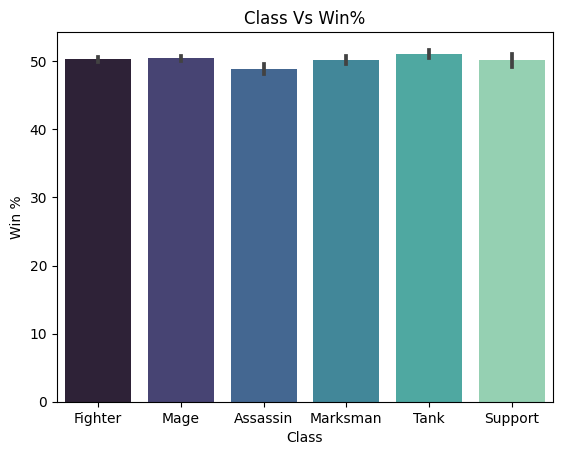

In [16]:
sns.barplot(data=df, x='Class', y='Win %')
plt.title('Class Vs Win%')
plt.show()

<AxesSubplot: xlabel='Win %', ylabel='Pick %'>

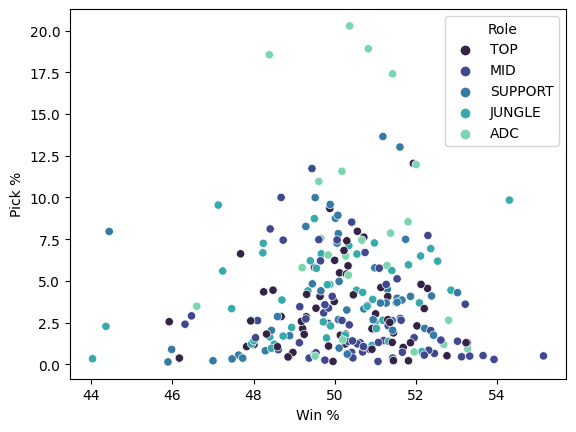

In [17]:
sns.scatterplot(data=df, y='Pick %', x='Win %', hue='Role', palette='mako')

<AxesSubplot: xlabel='Class', ylabel='count'>

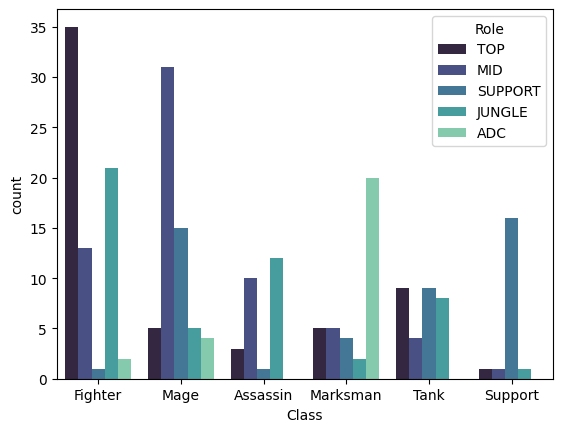

In [18]:
sns.countplot(x = df['Class'], data = df, hue='Role', palette='mako')

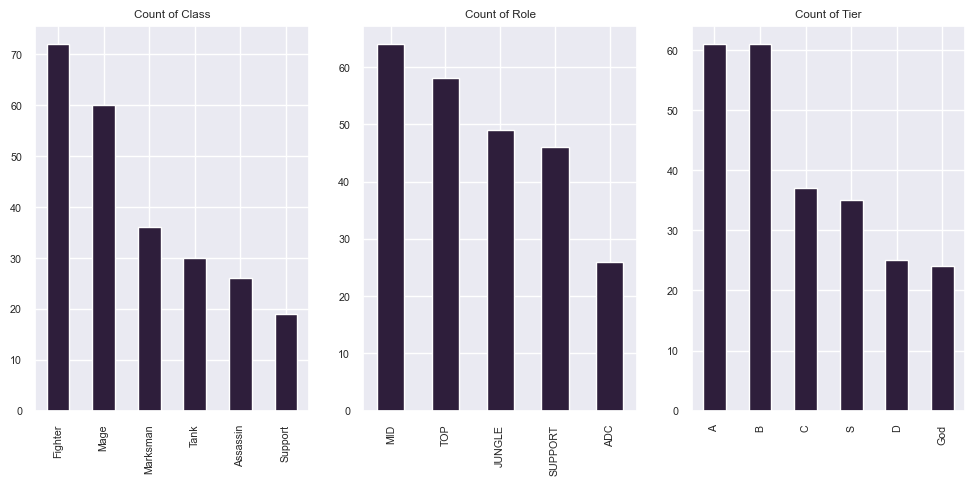

In [19]:
plt.figure(figsize=(12,5))
sns.set(font_scale=0.7)
sns.set_palette('mako')

plt.subplot(131)
df['Class'].value_counts().plot(kind='bar');
plt.title('Count of Class')

plt.subplot(132)
df['Role'].value_counts().plot(kind='bar');
plt.title('Count of Role')

plt.subplot(133)
df['Tier'].value_counts().plot(kind='bar');
plt.title('Count of Tier')
plt.show()

In [20]:
# Insights from above plot:
 
# 1. Most of the players are in 'Fighter' class
# 2. 'MID' Role is the frequent role.
# 3. 'A' and 'B' are common Tier for players, while 'God' is least common Tier.

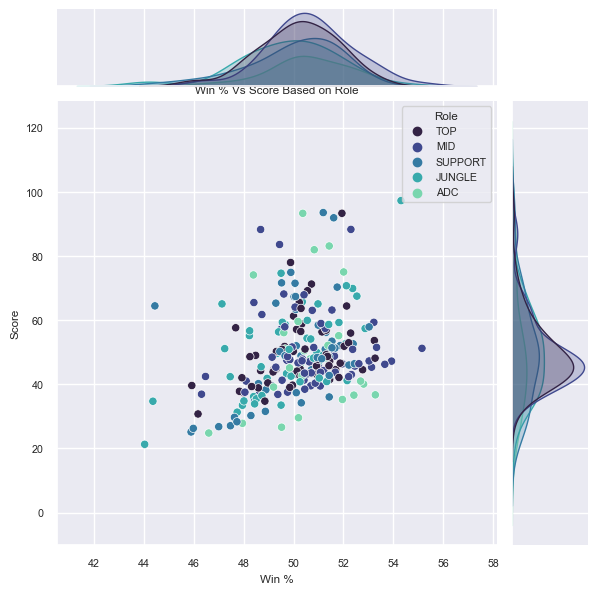

In [21]:
sns.jointplot(data=df, x='Win %', y='Score', kind='scatter', hue='Role', palette='mako')
plt.title('Win % Vs Score Based on Role')
plt.show()

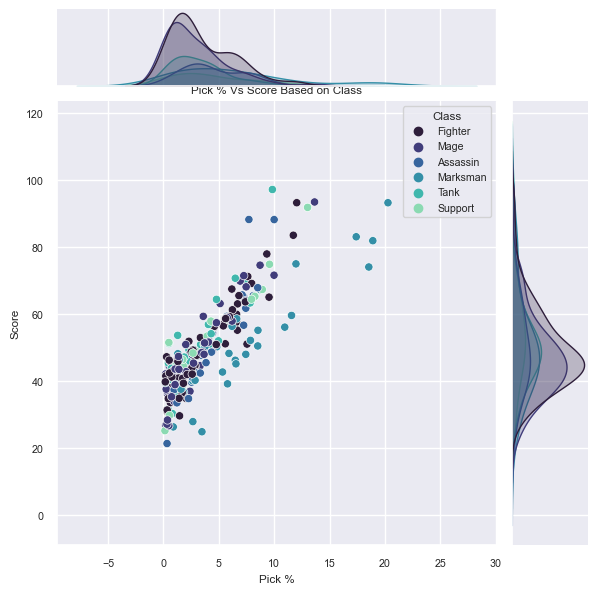

In [22]:
sns.jointplot(data=df, x='Pick %', y='Score', kind='scatter', hue='Class', palette='mako')
plt.title('Pick % Vs Score Based on Class')
plt.show()

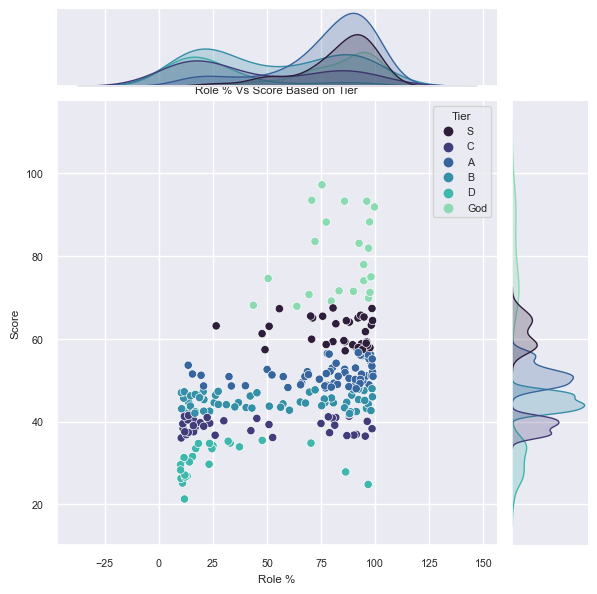

In [23]:
sns.jointplot(data=df, x='Role %', y='Score', kind='scatter', hue='Tier')
plt.title('Role % Vs Score Based on Tier')
plt.show()

In [24]:
df.head()

,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Fighter,TOP,S,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,Mage,MID,S,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,Assassin,MID,S,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,Assassin,TOP,C,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,Marksman,MID,A,49.39,0.34,51.62,66.03,2.75,3.79,2.26


Mapping values for Categorical features

In [25]:
df['Class'] = df['Class'].map({'Support':0, 'Assassin':1, 'Tank':2, 'Marksman':3, 'Mage':4, 'Fighter':5})
df['Role'] = df['Role'].map({'ADC':0, 'SUPPORT':1, 'JUNGLE':2, 'TOP':3, 'MID':4})
df['Tier'] = df['Tier'].map({'God':0, 'D':1, 'S':2, 'C':3, 'B':4, 'A':5})

In [26]:
df

,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,5,3,2,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,4,4,2,57.18,4.55,49.50,94.65,5.81,1.73,2.58
2,1,4,2,65.49,4.33,48.41,75.74,8.11,13.02,2.37
3,1,3,3,39.63,-1.51,45.92,23.50,2.55,13.02,2.00
4,3,4,5,49.39,0.34,51.62,66.03,2.75,3.79,2.26
...,...,...,...,...,...,...,...,...,...,...
239,0,4,5,51.52,-3.47,53.33,15.52,0.49,1.40,3.59
240,0,1,5,48.35,-2.49,50.95,79.72,2.67,1.40,3.11
241,4,4,5,48.46,2.43,49.14,87.85,3.45,1.45,2.60
242,4,1,1,28.33,-3.55,47.73,10.03,0.37,1.45,2.14


### Splitting Data

In [27]:
X = df.drop('Score', axis=1)
y = df['Score']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [30]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

In [31]:
print("Training Score: ", lin_model.score(x_train, y_train))
print("Testing Score: ", lin_model.score(x_test, y_test))

Training Score:  0.9342131168923363
Testing Score:  0.9333688444909016


In [32]:
print("Linear Model Coefficient(a): ", '\n',lin_model.coef_)
print("Linear Model Intercept(b): ", lin_model.intercept_)

Linear Model Coefficient(a):  
 [-0.14428302  2.9352584  -0.41493882  0.0631571   2.14902364  0.04112203
  2.87028656  0.36165122  3.36930282]
Linear Model Intercept(b):  -87.33986230945335


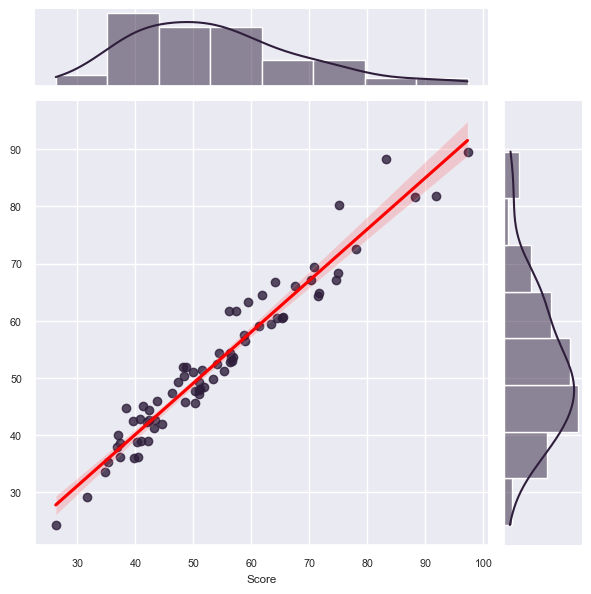

In [33]:
sns.jointplot(x=y_test, y = y_pred_lin, kind='reg', line_kws={'color':'red'} )

In [34]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_lin)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_lin))
MAE = mean_absolute_error(y_test, y_pred_lin)
R2_Score_lin = r2_score(y_test, y_pred_lin)
Adj_R2_Score = 1-(1-R2_Score_lin) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_lin, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_lin', 'Adj_R2_Score']

res_lin = pd.DataFrame({'columns':labels, 'Metric':metrics})

In [35]:
res_lin

,columns,Metric
0,MSE,13.971680
1,RMSE,3.737871
2,MAE,3.156590
3,R2_Score_lin,0.933369
4,Adj_R2_Score,1.479744


### Ridge Regression

In [36]:
ridge_model = Ridge(alpha=0.01, normalize=True)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_test)

In [37]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_ridge)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
MAE = mean_absolute_error(y_test, y_pred_ridge)
R2_Score_ridge = r2_score(y_test, y_pred_ridge)
Adj_R2_Score = 1-(1-R2_Score_ridge) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_ridge, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_ridge', 'Adj_R2_Score']

res_ridge = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_ridge

,columns,Metric
0,MSE,14.125173
1,RMSE,3.758347
2,MAE,3.164154
3,R2_Score_ridge,0.932637
4,Adj_R2_Score,1.485015


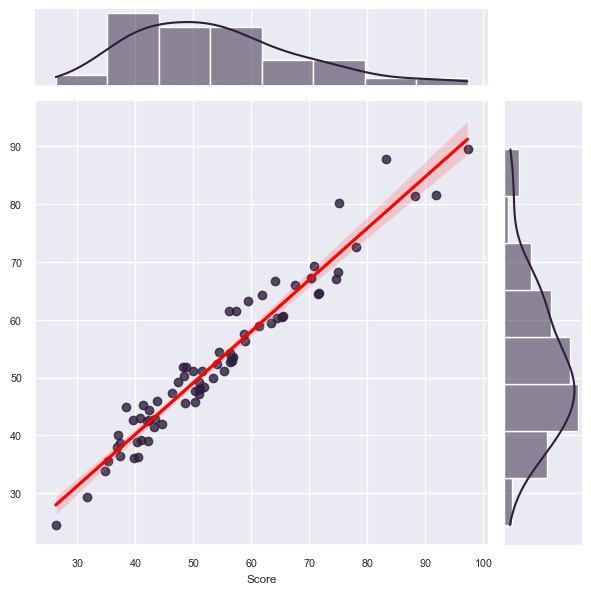

In [38]:
sns.jointplot(x=y_test, y = y_pred_ridge, kind='reg', line_kws={'color':'red'} )

### DecisionTreeRegressor

In [39]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [40]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_dt)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_dt))
MAE = mean_absolute_error(y_test, y_pred_dt)
R2_Score_dt = r2_score(y_test, y_pred_dt)
Adj_R2_Score = 1-(1-R2_Score_dt) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_dt, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_dt', 'Adj_R2_Score']

res_dt = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_dt

,columns,Metric
0,MSE,46.687879
1,RMSE,6.832853
2,MAE,4.010411
3,R2_Score_dt,0.777345
4,Adj_R2_Score,2.603118


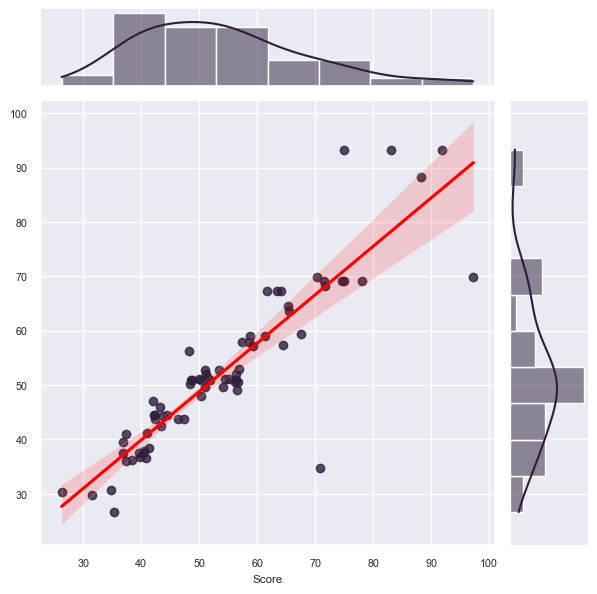

In [41]:
sns.jointplot(x=y_test, y = y_pred_dt, kind='reg', line_kws={'color':'red'} )

### RandomForestRegressor

In [42]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [43]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_rf))
MAE = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)
Adj_R2_Score = 1-(1-R2_Score_rf) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_rf, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_rf', 'Adj_R2_Score']

res_rf = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_rf

,columns,Metric
0,MSE,19.009329
1,RMSE,4.359969
2,MAE,2.816116
3,R2_Score_rf,0.909344
4,Adj_R2_Score,1.652722


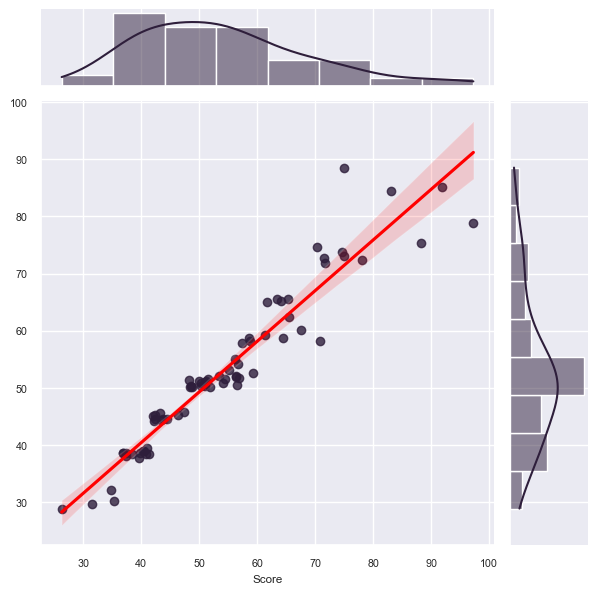

In [44]:
sns.jointplot(x=y_test, y = y_pred_rf, kind='reg', line_kws={'color':'red'} )

### XGBRegressor

In [45]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
y_pred_xgbr = xgbr.predict(x_test)

In [46]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_xgbr)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_xgbr))
MAE = mean_absolute_error(y_test, y_pred_xgbr)
R2_Score_xgbr = r2_score(y_test, y_pred_xgbr)
Adj_R2_Score = 1-(1-R2_Score_xgbr) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_xgbr, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_xgbr', 'Adj_R2_Score']

res_xgbr = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_xgbr

,columns,Metric
0,MSE,14.585624
1,RMSE,3.819113
2,MAE,2.560048
3,R2_Score_xgbr,0.930441
4,Adj_R2_Score,1.500825


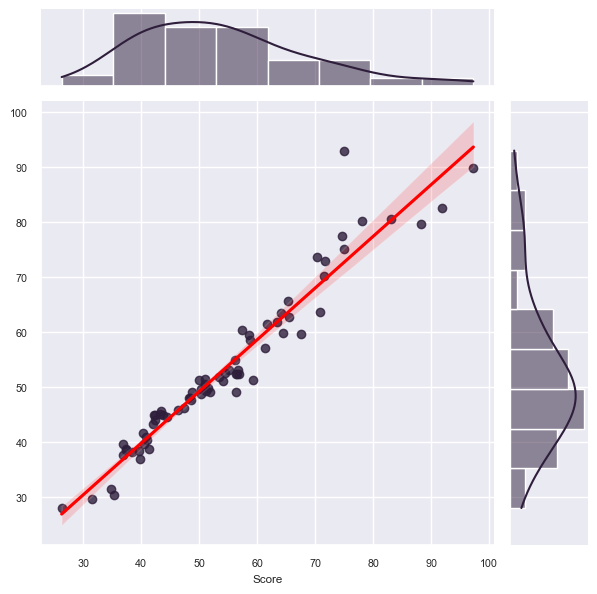

In [47]:
sns.jointplot(x=y_test, y = y_pred_xgbr, kind='reg', line_kws={'color':'red'} )
plt.show()

### Bagging Regressor

In [48]:
bag_model = BaggingRegressor()
bag_model.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)

In [49]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_bag)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_bag))
MAE = mean_absolute_error(y_test, y_pred_bag)
R2_Score_bag = r2_score(y_test, y_pred_bag)
Adj_R2_Score = 1-(1-R2_Score_bag) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_bag, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_bag', 'Adj_R2_Score']

res_bag = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_bag

,columns,Metric
0,MSE,24.182085
1,RMSE,4.917528
2,MAE,3.178151
3,R2_Score_bag,0.884675
4,Adj_R2_Score,1.830338


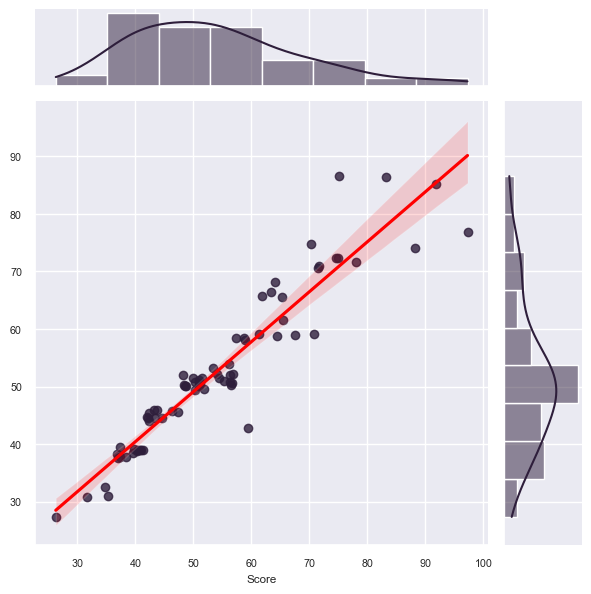

In [50]:
sns.jointplot(x=y_test, y = y_pred_bag, kind='reg', line_kws={'color':'red'} )
plt.show()

### ExtraTreesRegressor

In [51]:
extra_tree = ExtraTreesRegressor()
extra_tree.fit(x_train, y_train)
y_pred_extra = extra_tree.predict(x_test)

In [52]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_extra)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_extra))
MAE = mean_absolute_error(y_test, y_pred_extra)
R2_Score_extra = r2_score(y_test, y_pred_extra)
Adj_R2_Score = 1-(1-R2_Score_extra) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_extra, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_extra', 'Adj_R2_Score']

res_extra_tree = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_extra_tree

,columns,Metric
0,MSE,12.461702
1,RMSE,3.530114
2,MAE,2.442281
3,R2_Score_extra,0.940570
4,Adj_R2_Score,1.427896


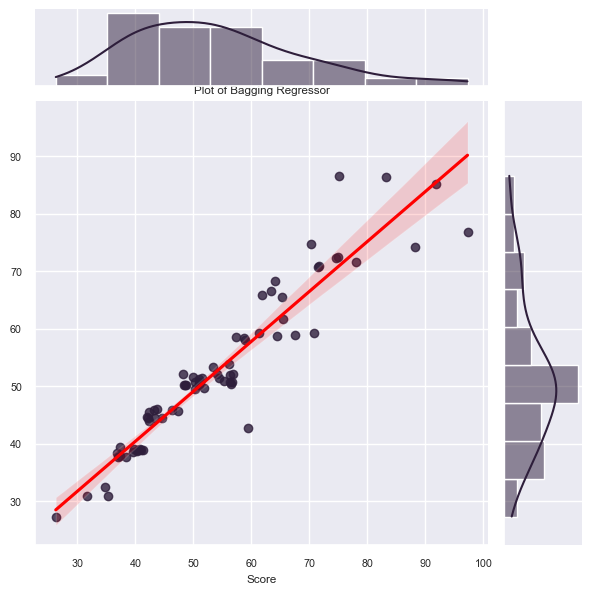

In [53]:
sns.jointplot(x=y_test, y = y_pred_bag, kind='reg', line_kws={'color':'red'} )
plt.title('Plot of Bagging Regressor')
plt.show()

In [54]:
# Testing first row of our dataset and predicting the values for each model.
# Extra Trees Regressor and Decision Tree Regressor have predicted the 'Score' exactly and other models came close.

In [55]:
metrics = [R2_Score_lin, R2_Score_ridge, R2_Score_dt, R2_Score_rf, R2_Score_xgbr, R2_Score_bag, R2_Score_extra]
labels = ['Linear Reg', 'Ridge Reg', 'Decision Tree', 'Random Forest', 'XGBRegressor', 'Bagging Regressor', 'Extra Tree Regressor']

Scores = pd.DataFrame({'Models':labels, 'R2_Score':metrics})
Scores.sort_values('R2_Score', ascending=False)

,Models,R2_Score
6,Extra Tree Regressor,0.940570
0,Linear Reg,0.933369
1,Ridge Reg,0.932637
4,XGBRegressor,0.930441
3,Random Forest,0.909344
5,Bagging Regressor,0.884675
2,Decision Tree,0.777345


In [56]:
# testing the predicted value for first two rows of the dataset

row1 = [[5,3,2,-31.86,47.68,91.63,6.62,11.98,1.77]]
row2 = [[4,4,2,4.55,49.50,94.65,5.81,1.73,2.58]]

mod_ex1 = extra_tree.predict(row1) # Extra Tree Classifier
mod_ex2 = extra_tree.predict(row2)
print(mod_ex1)
print(mod_ex2)

[57.63]
[57.18]


In [57]:
df.head(2)

,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,5,3,2,57.63,-31.86,47.68,91.63,6.62,11.98,1.77
1,4,4,2,57.18,4.55,49.50,94.65,5.81,1.73,2.58


### HyperParameter tuning the best models

### HyperParameter Tuning of Extra Trees Regressor

In [58]:
extra_tree = ExtraTreesRegressor()
param_extra = {
    'n_estimators': [50,100,150,200,400,500],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth': np.arange(1,11,2),
    'max_features': [7]   
}
cv = KFold(n_splits=5, shuffle=True)
gcv_extra = GridSearchCV(extra_tree, param_extra, verbose=True, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
gcv_extra.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': array([1, 3, 5, 7, 9]),
                         'max_features': [7],
                         'n_estimators': [50, 100, 150, 200, 400, 500]},
             scoring='neg_mean_squared_error', verbose=True)

In [59]:
gcv_extra.best_estimator_

ExtraTreesRegressor(criterion='poisson', max_depth=9, max_features=7,
                    n_estimators=50)

In [60]:
extra_tree_tuned = ExtraTreesRegressor(criterion='absolute_error', max_depth=8, max_features=7,n_estimators=350, random_state=1)
extra_tree_tuned.fit(x_train, y_train)
y_pred_extra_tuned = extra_tree_tuned.predict(x_test)

In [61]:
r2_score(y_test, y_pred_extra_tuned)

0.93760474663852

In [62]:
print("R2 Score for XGBRegressor before Hyperparamter tuning: ", r2_score(y_test, y_pred_extra))
print("R2 Score for XGBRegressor after Hyperparamter tuning: ", r2_score(y_test, y_pred_extra_tuned))

R2 Score for XGBRegressor before Hyperparamter tuning:  0.9405699525322451
R2 Score for XGBRegressor after Hyperparamter tuning:  0.93760474663852


No change in R2 score after tuning for ExtraTreesRegressor

### HyperParameter Tuning of XGBRegressor

In [63]:
xgbr = XGBRegressor()
params_xgbr = {
    'max_depth': np.arange(1,15,2),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 500, 1000]
}
cv = KFold(n_splits=5, shuffle=True)
gcv_xgbr = GridSearchCV(xgbr, params_xgbr, cv=cv, verbose=True, n_jobs=-1)
gcv_xgbr.fit(x_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'n_estimators': [100, 500, 1000]},
             verbose=True)

In [64]:
gcv_xgbr.best_params_

{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 1000}

In [65]:
params_xgbr2 = {
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1)
}
cv = KFold(n_splits=5, shuffle=True)
gcv_xgbr2 = GridSearchCV(estimator=XGBRegressor(learning_rate=0.2, max_depth=1,n_estimators=1000),
                       param_grid=params_xgbr2, cv=cv, verbose=True, n_jobs=-1)
gcv_xgbr2.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_depth=1, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=1000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             verbose=True)

In [66]:
gcv_xgbr2.best_params_

{'colsample_bylevel': 0.7999999999999999,
 'colsample_bytree': 0.8999999999999999,
 'subsample': 0.6}

In [67]:
xgbr_tuned = XGBRegressor(learning_rate=0.2, max_depth=1,n_estimators=1000, colsample_bylevel=0.89999,
                         colsample_bytree=0.89999, subsample=0.6, random_state=1)
xgbr_tuned.fit(x_train, y_train)
y_pred_xgbr_tuned = xgbr_tuned.predict(x_test)

In [68]:
n = len(x_test)
k = x_test.shape[1]

MSE = mean_squared_error(y_test, y_pred_xgbr_tuned)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_xgbr_tuned))
MAE = mean_absolute_error(y_test, y_pred_xgbr_tuned)
R2_Score_xgbr2 = r2_score(y_test, y_pred_xgbr_tuned)
Adj_R2_Score = 1-(1-R2_Score_xgbr2) * (n-1)/ (-k-1)

metrics = [MSE, RMSE, MAE, R2_Score_xgbr2, Adj_R2_Score]
labels = ['MSE', 'RMSE', 'MAE', 'R2_Score_xgbr2', 'Adj_R2_Score']

res_extra_tree = pd.DataFrame({'columns':labels, 'Metric':metrics})
res_extra_tree

,columns,Metric
0,MSE,6.288418
1,RMSE,2.507672
2,MAE,1.902124
3,R2_Score_xgbr2,0.970010
4,Adj_R2_Score,1.215925


In [69]:
print("R2 Score for XGBRegressor before Hyperparamter tuning: ", r2_score(y_test, y_pred_xgbr))
print("R2 Score for XGBRegressor after Hyperparamter tuning: ", r2_score(y_test, y_pred_xgbr_tuned))

R2 Score for XGBRegressor before Hyperparamter tuning:  0.9304409351813545
R2 Score for XGBRegressor after Hyperparamter tuning:  0.9700104381520516


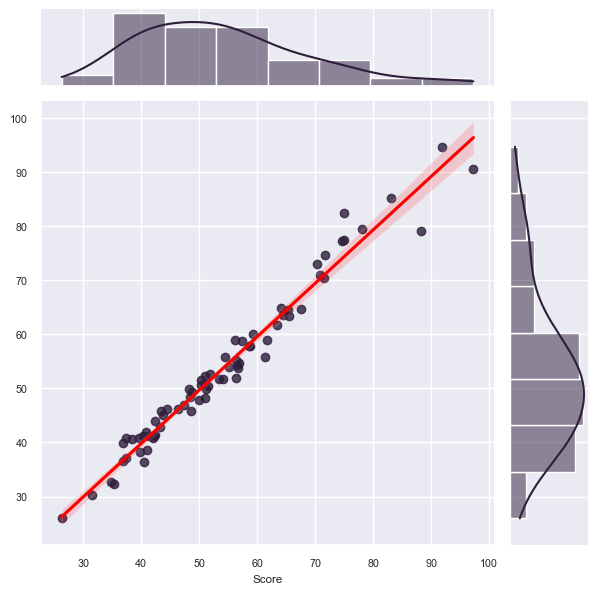

In [70]:
sns.jointplot(x=y_test, y = y_pred_xgbr_tuned, kind='reg', line_kws={'color':'red'} )
plt.show()

The best model for this dataset is XGBRegressor with Hyperparameter tuning, which achieved a R2 score of 0.9748

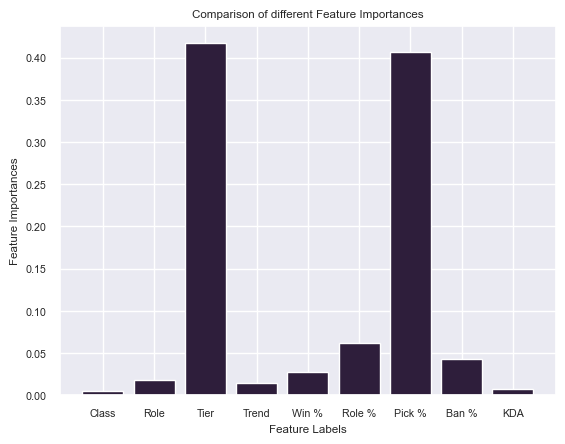

In [73]:
# Finding important features
extra_tree = ExtraTreesRegressor()
extra_tree.fit(x_train, y_train)

feature_imp = extra_tree.feature_importances_

plt.bar(X.columns, feature_imp)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

#### Most important features are 'Tier' and 'Pick %', followed by 'Role %' , while 'Class' and 'KDA' are least important features